In [2]:
import sys, os
import pandas as pd
import numpy as np
sys.version

'3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:55:52) \n[GCC 7.5.0]'

In [3]:
!ls /home/myao/dev/data/gamedata/data

dn_character_his_3m.txt				 sample_friendpurchase.txt
dn_character_his_3m_utf-8.txt			 samplepurchase.txt
dn_character_his_map_uft-8.csv			 stable_buysample.txt
dn_character_uft-8.csv				 stable_buy_utf-8.txt
dn_deposit_3m.txt				 stable_sellsample.txt
dn_deposit_3m_utf-8.txt				 stable_sell_utf-8.txt
dn_deposit_char_map_3m_utf-8.txt		 stable_tradesample0413.txt
dn_deposit_char_map_3m_utf-8.txt.bak		 stable_tradesample.txt
dn_friend_utf-8.txt				 teamstagelog1029.txt
dn_itemtrade_3m_union_utf-8.pkl.xz		 tradefriendstage.txt
dn_itemtrade_3m_union_utf-8.txt			 tradefriend.txt
dn_itemtrade_3m_union_with_user_id_utf-8.pkl.xz  tradepurchase_0301.txt
dn_itemtrade_3m_union_with_user_id_utf-8.txt	 tradesample_0301.txt
dn_stage_end_log.txt				 tradesample_cleaned.csv
esale_deposit_his.txt				 trade_samplefriend.txt
esale_deposit_his_utf-8.txt			 tradesample_id.txt
pt_id_uft-8.csv					 tradesample_stage.txt
pt_id_v2_uft-8.csv				 tradesample.txt


In [4]:
import datetime as dt
def convert2datetime(x):
  #print(x)
  if isinstance(x, dt.datetime):
    return x
  if isinstance(x, str) and x != '0':
    return dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
  return np.nan 

def convert2date(x):
  #print(x)
  return np.nan if x== '0' or x == 0 else dt.datetime.strptime(x,'%Y-%m-%d')

In [5]:
data_file_path = "/home/myao/dev/data/gamedata/data"

itemtrade_union_file = os.path.join(data_file_path, "dn_itemtrade_3m_union_with_user_id_utf-8.txt" )
trade_union_pickle =  os.path.join(data_file_path, "dn_itemtrade_3m_union_with_user_id_utf-8.pkl.xz" )
esale_deposit_his = os.path.join(data_file_path, "esale_deposit_his_utf-8.txt")
dn_deposit_his = os.path.join(data_file_path, "dn_deposit_3m_utf-8.txt")
pt_id_file = os.path.join(data_file_path, "pt_id_v2_uft-8.csv")
deposit_char_map = os.path.join(data_file_path, "dn_character_his_map_uft-8.csv")
dep_char_map_pickle = os.path.join(data_file_path, "dn_character_his_map_uft-8..pkl.xz")

In [7]:
#trade_df = pd.read_csv(itemtrade_union_file)

In [10]:
#trade_df['TRADEDATE'] = trade_df['TRADEDATE'].apply(convert2datetime)
#print("proceed TRADEDATE")
#trade_df['DATA_DESC'] = trade_df['DATA_DESC'].apply(convert2date)
#print("proceed DATA_DESC")
#trade_df['SELLER'] = trade_df['SELLER'].astype('str')
#print("proceed SELLER")
#trade_df['BUYER'] = trade_df['BUYER'].astype('str')
#print("proceed BUYER")
#trade_df.to_pickle(trade_union_pickle, compression="gzip")

proceed TRADEDATE
proceed DATA_DESC
proceed SELLER
proceed BUYER


trade_df.to_pickle(trade_union_pickle, compression="gzip")

--Read from this file to save time.

In [6]:
trade_df = pd.read_pickle(trade_union_pickle, compression="gzip")

In [7]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18966152 entries, 0 to 18966151
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   characterid_buyer   int64         
 1   pt_id_buyer         object        
 2   characterid_seller  int64         
 3   pt_id_seller        object        
 4   AREA_ID             int64         
 5   GROUP_ID            float64       
 6   TRADEDATE           datetime64[ns]
 7   SELLER              object        
 8   BUYER               object        
 9   ITEMID              int64         
 10  ITEMCOUNT           int64         
 11  PRICE               int64         
 12  REGISTERCOMMISSION  int64         
 13  TRADECOMMISSION     int64         
 14  DATA_DESC           datetime64[ns]
 15  ITEMSERIAL          int64         
 16  ITEMLEVEL           int64         
dtypes: datetime64[ns](2), float64(1), int64(10), object(4)
memory usage: 2.4+ GB


In [8]:
trade_df.head()

,characterid_buyer,pt_id_buyer,characterid_seller,pt_id_seller,AREA_ID,GROUP_ID,TRADEDATE,SELLER,BUYER,ITEMID,ITEMCOUNT,PRICE,REGISTERCOMMISSION,TRADECOMMISSION,DATA_DESC,ITEMSERIAL,ITEMLEVEL
0,10627119,qq894075687,21398670,king834779962,1,NaN,2011-02-24 13:01:19,kinglbj06,盛夏る庭院い,1107378176,1,990000,0,0,2011-02-24,676024207177426172,0
1,10627119,qq894075687,21453636,superripp,1,NaN,2011-02-12 20:59:46,無言勿語,盛夏る庭院い,336605696,1,10050,0,0,2011-02-12,705005942199452236,0
2,10627119,qq894075687,21463587,asd1049428770,1,NaN,2011-02-13 22:24:33,李赢,盛夏る庭院い,872415266,11,10000,0,0,2011-02-13,705518877258532602,0
3,10627119,qq894075687,215804,1182973456.sdo,1,NaN,2011-03-25 15:53:57,gto、战神,盛夏る庭院い,277552128,1,1500635,0,0,2011-03-25,705609702935582188,0
4,10627119,qq894075687,21712859,wjzzjf110,1,NaN,2011-01-28 20:53:13,moion,盛夏る庭院い,872415266,3,5000,0,0,2011-01-28,704102800769923905,0


In [9]:
trade_df.describe()

,characterid_buyer,characterid_seller,AREA_ID,GROUP_ID,ITEMID,ITEMCOUNT,PRICE,REGISTERCOMMISSION,TRADECOMMISSION,ITEMSERIAL,ITEMLEVEL
count,1.896615e+07,1.896615e+07,1.896615e+07,0.0,1.896615e+07,1.896615e+07,1.896615e+07,18966152.0,18966152.0,1.896615e+07,1.896615e+07
mean,1.072138e+07,1.072138e+07,4.440197e+00,NaN,4.389537e+08,6.500345e+00,4.324791e+05,0.0,0.0,7.398597e+17,8.180421e-02
std,8.990351e+06,8.990351e+06,7.584168e+00,NaN,2.536540e+08,1.148537e+01,1.338529e+06,0.0,0.0,3.433277e+17,7.753641e-01
min,4.000000e+00,4.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,3.360826e+15,0.000000e+00
25%,1.593846e+06,1.593846e+06,1.000000e+00,NaN,3.063552e+08,1.000000e+00,1.028000e+04,0.0,0.0,4.235126e+17,0.000000e+00
50%,9.657377e+06,9.657377e+06,1.000000e+00,NaN,3.366177e+08,1.000000e+00,4.900000e+04,0.0,0.0,7.041000e+17,0.000000e+00
75%,1.961532e+07,1.961532e+07,1.000000e+00,NaN,3.387564e+08,1.000000e+01,3.900000e+05,0.0,0.0,9.864033e+17,0.000000e+00
max,3.050351e+07,3.050351e+07,3.300000e+01,NaN,1.107413e+09,9.990000e+02,2.400007e+08,0.0,0.0,9.221737e+18,1.400000e+01


### ITEMLEVEL Analysis

In [11]:
trade_df["ITEMLEVEL"].value_counts()

0     18744556
7        56397
6        52318
8        45756
9        20006
10       15541
5        12924
4         7580
3         5728
11        1800
1         1656
2         1504
12         300
13          80
14           6
Name: ITEMLEVEL, dtype: int64

### ITEMID

In [12]:
trade_df["ITEMID"].value_counts()

336617984     1178967
1107378176    1014441
872415267      972279
336617728      859674
336605696      658759
               ...   
440754177           2
270148608           2
272633808           1
441149441           1
272633824           1
Name: ITEMID, Length: 6193, dtype: int64

In [13]:
trade_df["DATA_DESC"].value_counts().sort_values( ascending=False).sort_values( ascending=False)

2011-01-01    308849
2011-01-02    307494
2011-01-30    290579
2011-01-03    279878
2011-01-29    278853
               ...  
2011-03-09    163627
2011-03-03    159476
2011-03-10    159380
2011-01-05     50139
2011-01-06     50031
Name: DATA_DESC, Length: 90, dtype: int64

In [14]:
trade_df.groupby("ITEMID").characterid_buyer.agg('count').sort_values( ascending=False)

ITEMID
336617984     1178967
1107378176    1014441
872415267      972279
336617728      859674
336605696      658759
               ...   
270737154           2
283249536           2
441149441           1
272633824           1
272633808           1
Name: characterid_buyer, Length: 6193, dtype: int64

### AREA_ID

In [15]:
trade_df["AREA_ID"].value_counts()

1     14313829
28      374713
2       343183
18      246510
6       230750
5       222933
8       222849
33      217391
10      215150
3       213157
14      196561
27      190109
21      186011
4       167373
7       128814
19      128557
15      122395
11      120691
26      119215
12      115428
25      115016
13      110637
17      108900
9       105487
20      100920
24       97420
23       96230
16       88369
22       67554
Name: AREA_ID, dtype: int64

In [15]:
#trade_df.groupby("pt_id_seller").pt_id_buyer.filter(lambda x: x.len() == 4)
df1 = trade_df[trade_df.groupby(['pt_id_seller'])['pt_id_buyer'].transform('count') ==5 ]

In [17]:
df1.groupby(['pt_id_seller'])['pt_id_buyer'].agg('count').sort_values( ascending=False)

pt_id_seller
zzzchaozzz        5
h451556347h       5
h650464582011     5
h644947851        5
h63668391         5
                 ..
qq385060529       5
qq384514354       5
qq378587819       5
qq375257424       5
1105089174.sdo    5
Name: pt_id_buyer, Length: 11963, dtype: int64

In [18]:
trade_df.groupby("pt_id_seller").pt_id_buyer.agg('count').sort_values( ascending=False)

pt_id_seller
zongzong622             30189
sjwydn900               17833
oo559900                16635
1183404834.sdo          15022
adias2000008            14238
                        ...  
15266668692.sdo             1
mp00004666941apw.sdo        1
15262920302.sdo             1
xiaoxiaoa0420               1
cl1628john                  1
Name: pt_id_buyer, Length: 315366, dtype: int64

In [23]:
trade_df.groupby("pt_id_buyer").pt_id_seller.agg('count').sort_values( ascending=False)

pt_id_buyer
zongzong622             30189
sjwydn900               17833
oo559900                16635
1183404834.sdo          15022
adias2000008            14238
                        ...  
15266668692.sdo             1
mp00004666941apw.sdo        1
15262920302.sdo             1
xiaoxiaoa0420               1
cl1628john                  1
Name: pt_id_seller, Length: 315366, dtype: int64

<AxesSubplot:ylabel='pt_id_seller'>

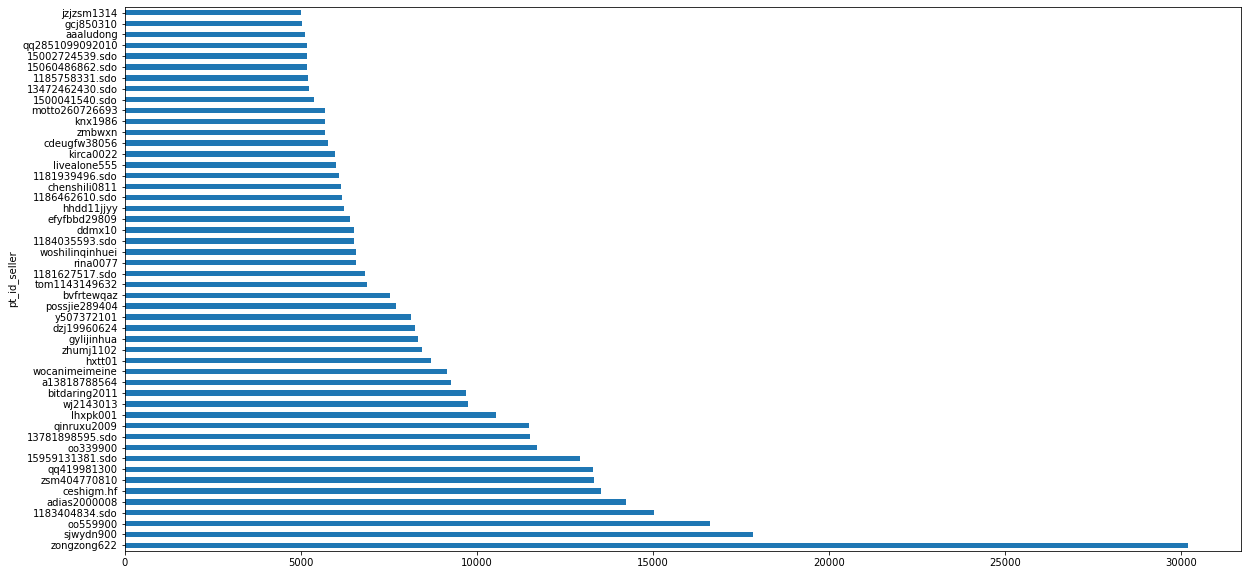

In [12]:
trade_df.groupby("pt_id_seller").pt_id_buyer.agg('count').sort_values( ascending=False)[:50].plot(figsize=(20,10),kind='barh')


<AxesSubplot:ylabel='pt_id_seller'>

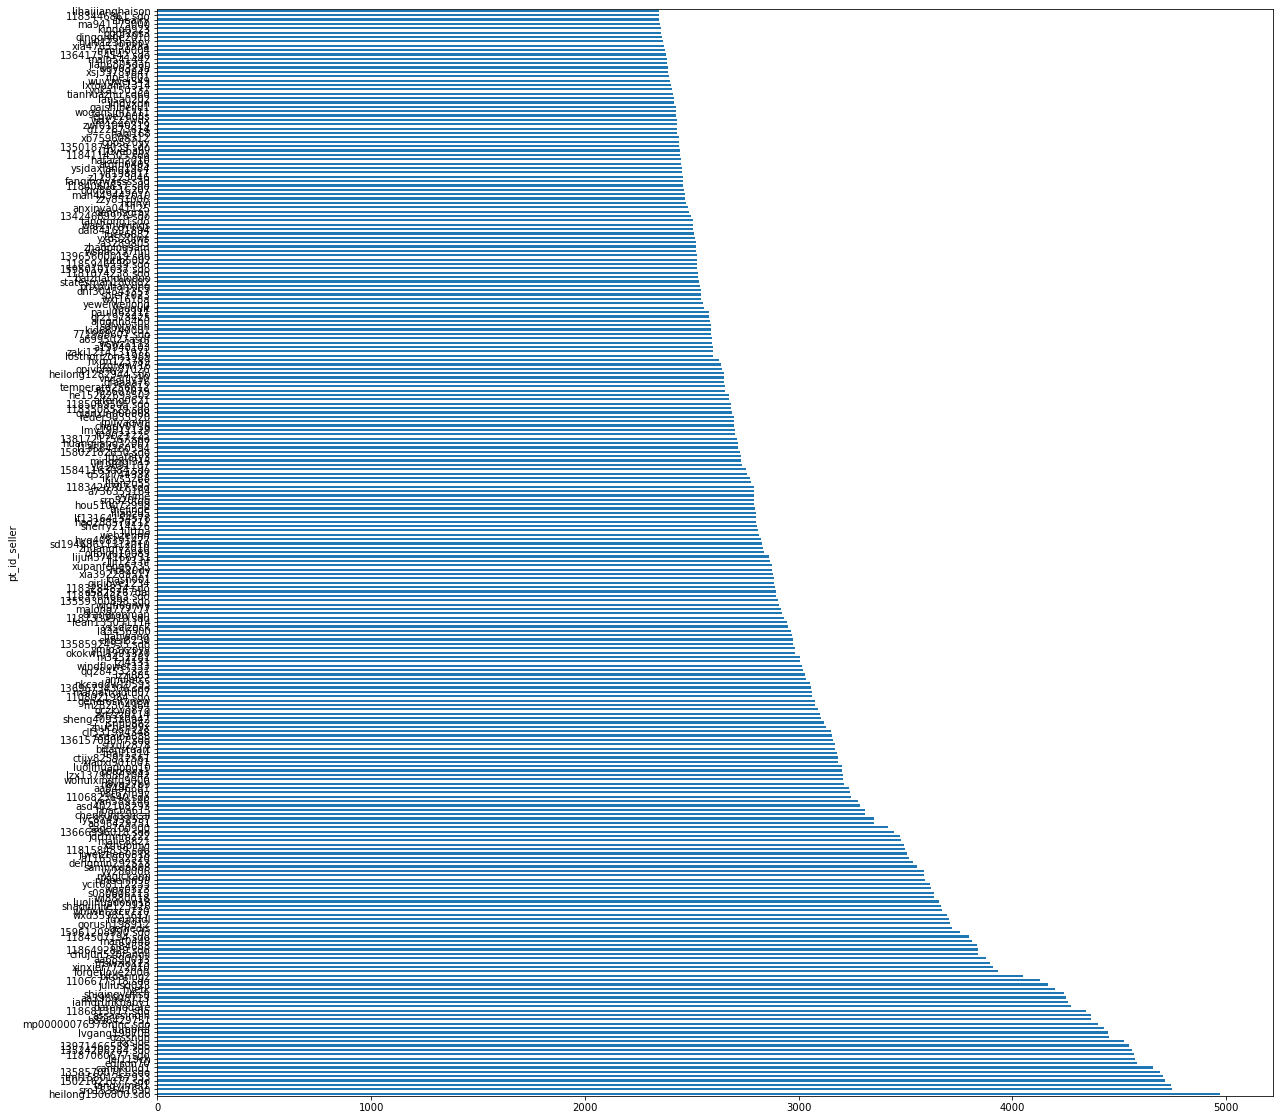

In [13]:
trade_df.groupby("pt_id_seller").pt_id_buyer.agg('count').sort_values( ascending=False)[51:300].plot(figsize=(20,20),kind='barh')

<AxesSubplot:ylabel='Frequency'>

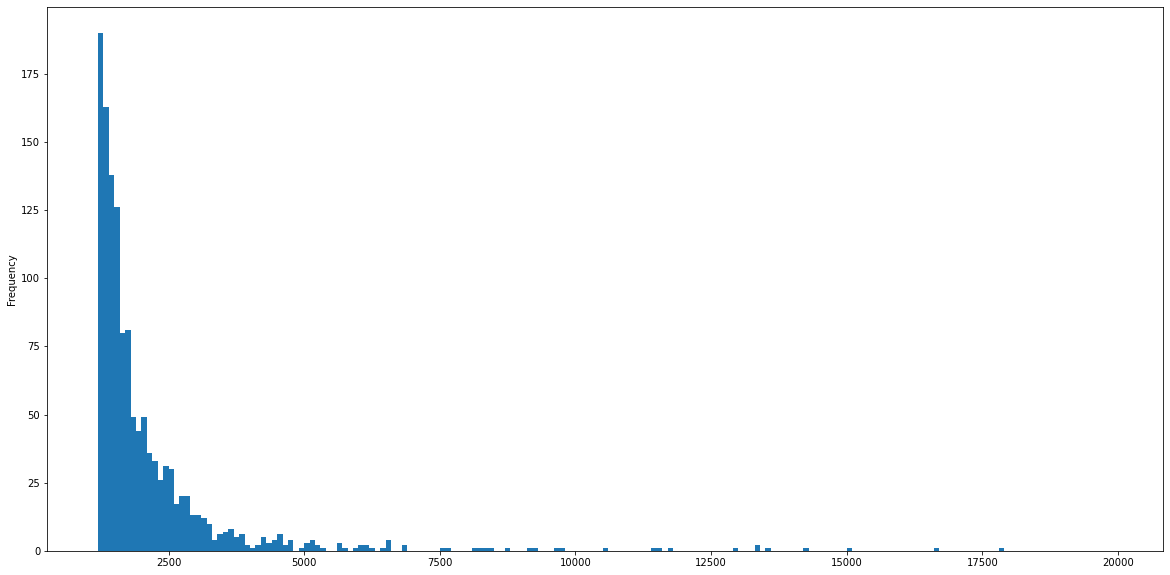

In [14]:
bin_values = np.arange(start=1200, stop=20000, step=100)
trade_df.groupby("pt_id_seller").pt_id_buyer.agg('count').sort_values( ascending=False)[:20000].plot(kind='hist',bins=bin_values,figsize=(20,10))

In [17]:
trade_df.groupby("pt_id_buyer").pt_id_seller.agg('count').sort_values( ascending=False)

pt_id_buyer
zongzong622             30189
sjwydn900               17833
oo559900                16635
1183404834.sdo          15022
adias2000008            14238
                        ...  
15266668692.sdo             1
mp00004666941apw.sdo        1
15262920302.sdo             1
xiaoxiaoa0420               1
cl1628john                  1
Name: pt_id_seller, Length: 315366, dtype: int64

<AxesSubplot:ylabel='pt_id_buyer'>

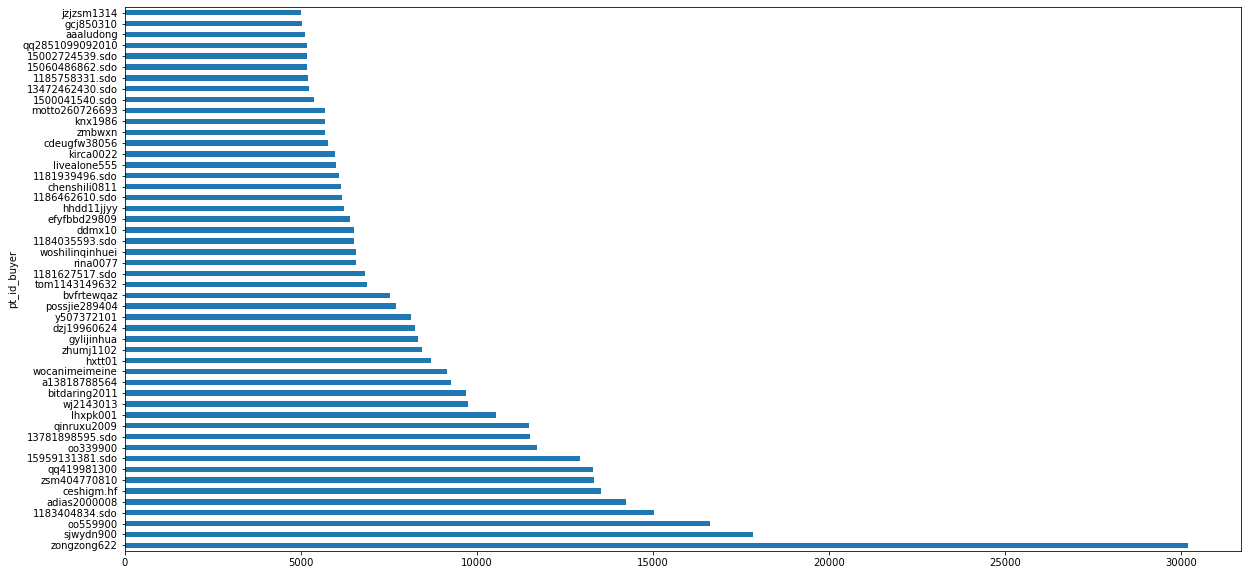

In [15]:
trade_df.groupby("pt_id_buyer").pt_id_seller.agg('count').sort_values( ascending=False)[:50].plot(figsize=(20,10),kind='barh')


In [20]:
column_names = ['PT_ID','PT_ID2','unknown1','Price_Paid','Retail_Price','unknown2','Sales_Date','IP_address','unknown3']

df_esale = pd.read_csv(esale_deposit_his,names = column_names, header=None, parse_dates=["Sales_Date"], delimiter = '|')
                       
                       
                       

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
df_esale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114650 entries, 0 to 1114649
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   PT_ID         1114650 non-null  object        
 1   PT_ID2        1114650 non-null  object        
 2   unknown1      1114650 non-null  int64         
 3   Price_Paid    1114650 non-null  float64       
 4   Retail_Price  1114650 non-null  int64         
 5   unknown2      1114650 non-null  int64         
 6   Sales_Date    1114650 non-null  datetime64[ns]
 7   IP_address    1114612 non-null  float64       
 8   unknown3      1114650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 76.5+ MB


In [22]:
df_esale.head(100)

,PT_ID,PT_ID2,unknown1,Price_Paid,Retail_Price,unknown2,Sales_Date,IP_address,unknown3
0,s4791192.bnb1,s4791192.bnb1,0,3.36,4,2,2011-01-01,1.989221e+09,10
1,b13224711746,b13224711746,0,26.70,30,2,2011-01-01,1.032481e+09,10
2,shengdahenlan1,shengdahenlan1,0,44.50,50,2,2011-01-01,9.767567e+08,10
3,y13973351714,y13973351714,0,8.90,10,2,2011-01-01,1.989221e+09,10
4,tb807,tb807,0,8.90,10,2,2011-01-01,1.949821e+09,10
...,...,...,...,...,...,...,...,...,...
95,samliy01,samliy01,0,26.70,30,2,2011-01-01,2.061556e+09,10
96,15097892030.sdo,15097892030.sdo,0,18.20,20,2,2011-01-01,1.942450e+09,10
97,1186944612.sdo,1186944612.sdo,0,89.00,100,2,2011-01-01,1.949723e+09,10
98,1186944612.sdo,1186944612.sdo,0,17.80,20,2,2011-01-01,1.949608e+09,10


In [23]:
df_esale["unknown1"].value_counts()

0    1114650
Name: unknown1, dtype: int64

In [24]:
df_esale["unknown2"].value_counts()

2    1114650
Name: unknown2, dtype: int64

In [25]:
df_esale["unknown3"].value_counts()

20    466165
10    295803
60    223909
30     82381
21     28875
6B     13643
95      2734
33       602
30       535
33         3
Name: unknown3, dtype: int64

In [26]:
df_esale["Sales_Date"].value_counts()

2011-01-27    62878
2011-01-28    46696
2011-01-01    46660
2011-01-02    45803
2011-01-29    43562
2011-01-30    42756
2011-01-31    41779
2011-01-03    41706
2011-01-09    38927
2011-01-08    38728
2011-01-16    36191
2011-01-15    35731
2011-01-10    34555
2011-01-21    34507
2011-01-22    34423
2011-01-23    33675
2011-01-04    33587
2011-01-20    33394
2011-01-17    33388
2011-01-11    32168
2011-01-24    32016
2011-01-19    31521
2011-01-07    30132
2011-01-14    29736
2011-01-18    29516
2011-01-25    29318
2011-01-12    28987
2011-01-05    28948
2011-01-26    28399
2011-01-13    27980
2011-01-06    26983
Name: Sales_Date, dtype: int64

<AxesSubplot:ylabel='Frequency'>

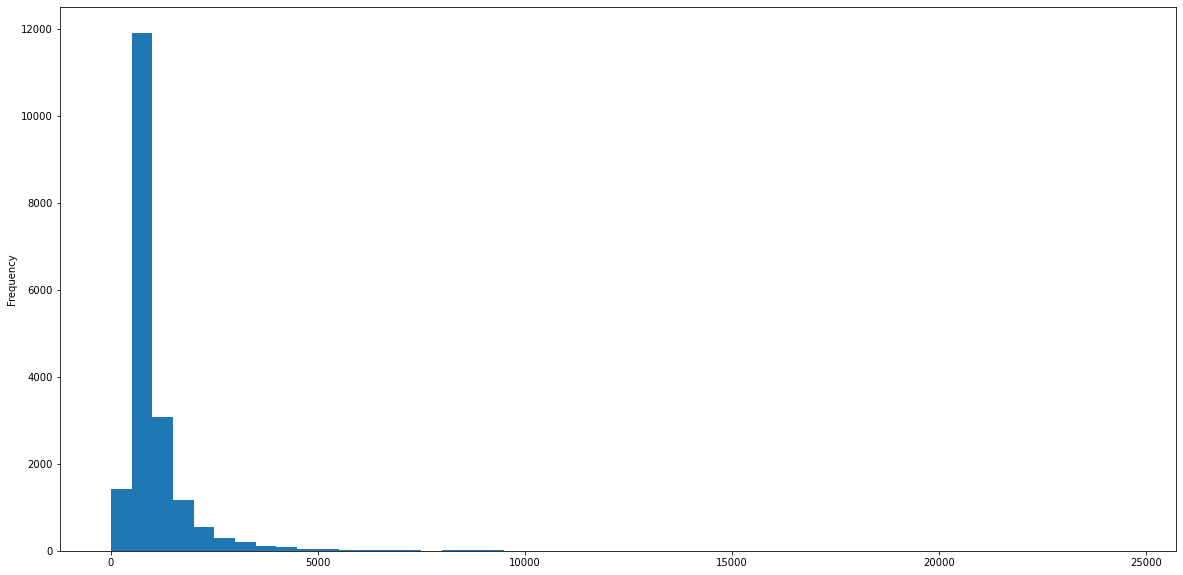

In [27]:
bin_values = np.arange(start=0, stop=25000, step=500)
df_esale.groupby("PT_ID").Price_Paid.agg('sum').sort_values( ascending=False)[:19000].plot(kind='hist',bins=bin_values,figsize=(20,10))

<AxesSubplot:ylabel='Frequency'>

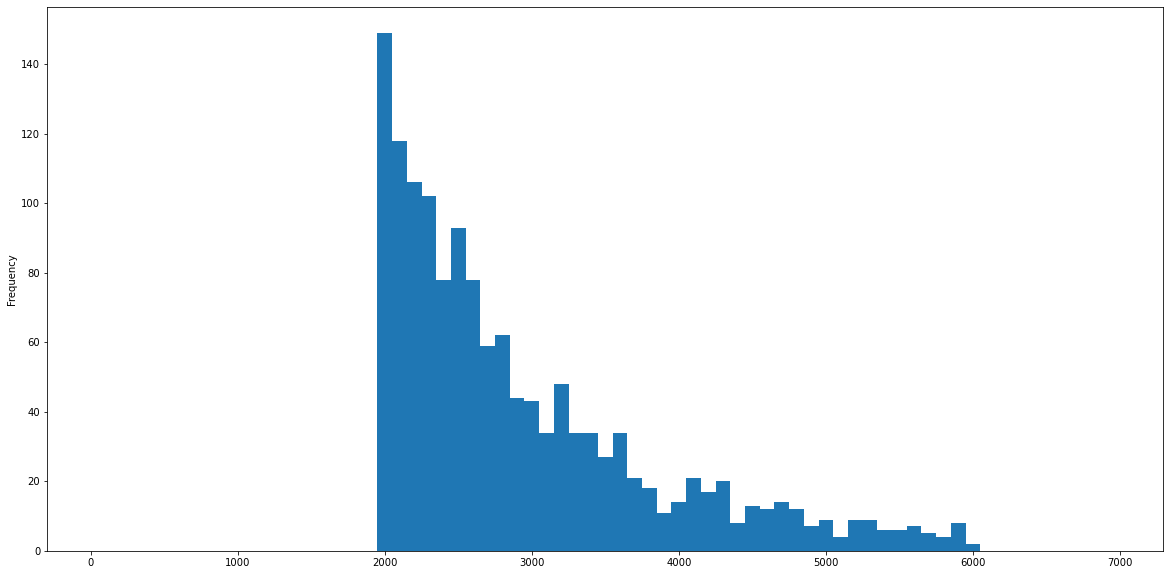

In [28]:
bin_values = np.arange(start=50, stop=7000, step=100)
df_esale.groupby("PT_ID").Price_Paid.agg('sum').sort_values(ascending=False)[100:1500].plot(kind='hist',bins=bin_values,figsize=(20,10))


In [29]:
column_names = ['PT_ID','playerid','areaid','price','retailprice','paymode','operatedate','operateip','source']

df_deposit_his = pd.read_csv(dn_deposit_his,names = column_names, skiprows=1, parse_dates=["operatedate"], delimiter = ',')
                       
                       
                       

In [30]:
df_deposit_his.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139256 entries, 0 to 2139255
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   PT_ID        object        
 1   playerid     object        
 2   areaid       int64         
 3   price        float64       
 4   retailprice  int64         
 5   paymode      int64         
 6   operatedate  datetime64[ns]
 7   operateip    float64       
 8   source       object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 146.9+ MB


In [31]:
df_deposit_his.head(100)

,PT_ID,playerid,areaid,price,retailprice,paymode,operatedate,operateip,source
0,1180698192.sdo,1180698192.sdo,0,9.3,10,2,2011-03-23,3.663204e+09,60
1,1180701195.sdo,1180701195.sdo,0,0.0,100,2,2011-03-04,9.926580e+08,20
2,1180710494.sdo,1180710494.sdo,0,7.6,8,2,2011-03-27,2.101863e+09,60
3,1180756549.sdo,1180756549.sdo,0,45.5,50,2,2011-03-06,2.030687e+09,10
4,1180759871.sdo,1180759871.sdo,0,9.3,10,2,2011-03-10,4.542826e+08,60
...,...,...,...,...,...,...,...,...,...
95,1181968948.sdo,1181968948.sdo,0,9.1,10,2,2011-03-31,2.061628e+09,10
96,1181972819.sdo,1181972819.sdo,0,54.6,60,2,2011-03-01,1.965118e+09,60
97,1181972819.sdo,1181972819.sdo,0,54.6,60,2,2011-03-13,1.965121e+09,60
98,1181972819.sdo,1181972819.sdo,0,91.0,100,2,2011-03-01,1.965118e+09,60


In [32]:
df_deposit_his["areaid"].value_counts()

0    2139256
Name: areaid, dtype: int64

In [33]:
df_deposit_his["paymode"].value_counts()

2    2139256
Name: paymode, dtype: int64

In [34]:
df_deposit_his["source"].value_counts().sort_index()

10    642424
20    729873
21     45059
30    162126
33      1155
35         1
60    524571
6B     28294
95      5715
Y6        38
Name: source, dtype: int64

In [35]:
df_deposit_his["operatedate"].value_counts().sort_index()

2011-01-01    35082
2011-01-02    34754
2011-01-03    32217
2011-01-04    26215
2011-01-05    22628
              ...  
2011-03-27    25706
2011-03-28    20429
2011-03-29    18991
2011-03-30    18907
2011-03-31    18708
Name: operatedate, Length: 90, dtype: int64

<AxesSubplot:ylabel='Frequency'>

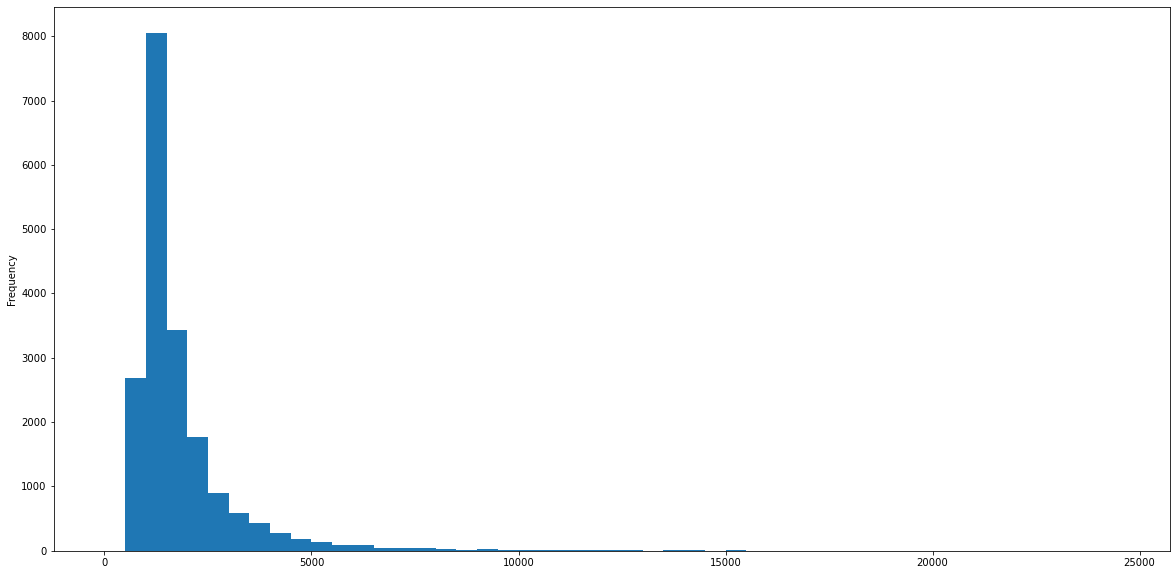

In [36]:
bin_values = np.arange(start=0, stop=25000, step=500)
df_deposit_his.groupby("PT_ID").price.agg('sum').sort_values( ascending=False)[:19000].plot(kind='hist',bins=bin_values,figsize=(20,10))



<AxesSubplot:ylabel='Frequency'>

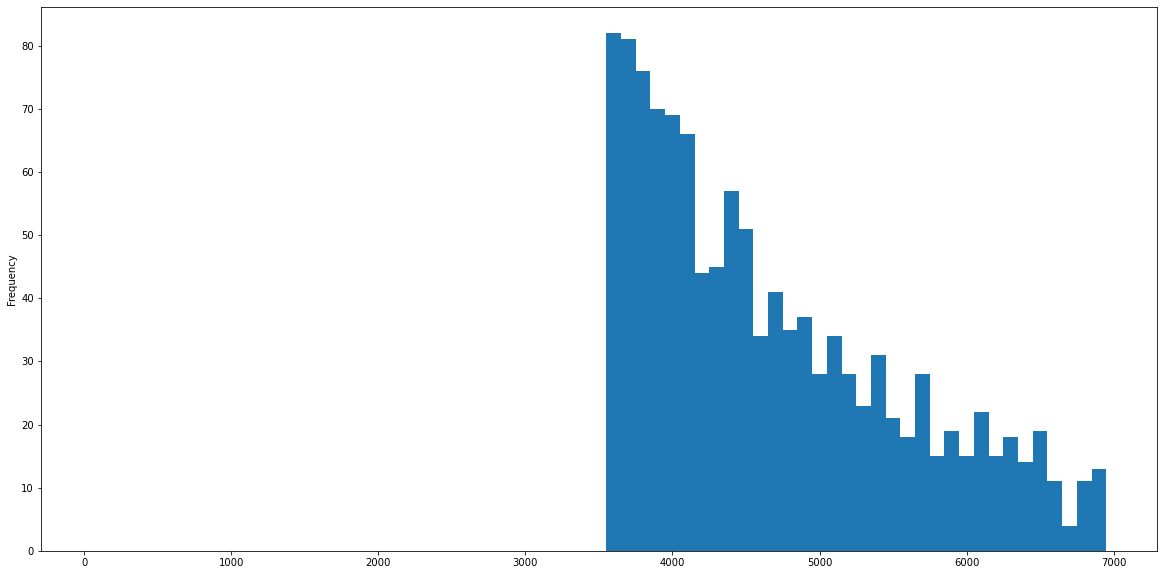

In [37]:
bin_values = np.arange(start=50, stop=7000, step=100)
df_deposit_his.groupby("PT_ID").price.agg('sum').sort_values(ascending=False)[100:1500].plot(kind='hist',bins=bin_values,figsize=(20,10))


In [20]:
column_names = ['PT_ID','character_id', 'createdate']
column_types = {'PT_ID': 'str', 'character_id':'Int64','createdate':'str' }
dep_char_map_df = pd.read_csv(deposit_char_map,names = column_names, skiprows = 1,  delimiter = ',',dtype=column_types, parse_dates=['createdate'])
#dep_char_map_df = pd.read_csv(deposit_char_map ,delimiter = ',')


In [70]:
dep_char_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13377792 entries, 0 to 13377791
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   PT_ID         object        
 1   character_id  Int64         
 2   createdate    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), object(1)
memory usage: 319.0+ MB


In [71]:
dep_char_map_df.head()

,PT_ID,character_id,createdate
0,1106969874.sdo,13745,2010-07-12 19:36:26
1,1106969874.sdo,6149,2010-07-12 19:04:54
2,1106974043.sdo,27843934,2011-05-07 23:13:39
3,1106977669.sdo,2194,2010-07-12 19:02:11
4,1106982860.sdo,669763,2010-07-25 06:58:52


<AxesSubplot:ylabel='PT_ID'>

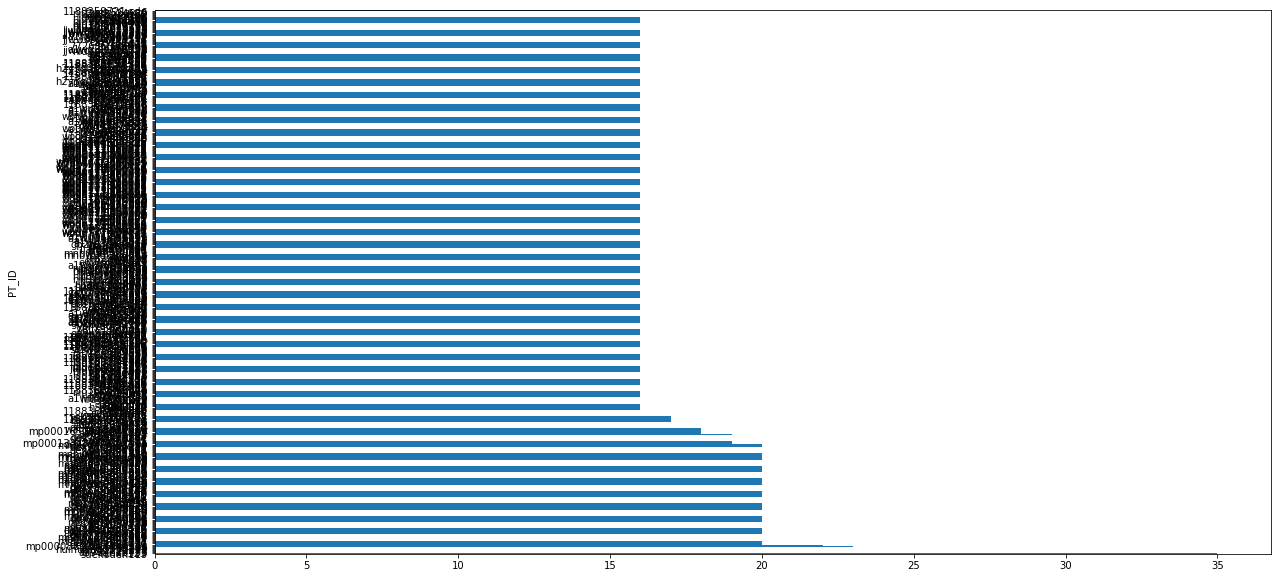

In [72]:
dep_char_map_df.groupby("PT_ID").character_id.agg('count').sort_values( ascending=False)[:500].plot(figsize=(20,10),kind='barh')


In [19]:
 dep_char_map_df["PT_ID"].value_counts().reset_index(name="count").query("count > 1").mean()

NameError: name 'dep_char_map_df' is not defined

In [74]:
dep_char_map_df["PT_ID"].nunique()

6381624

In [75]:
dep_char_map_df["character_id"].value_counts()

8392706     1
21063725    1
8409098     1
20998157    1
29390863    1
           ..
29378551    1
16376       1
29493183    1
25300926    1
29362175    1
Name: character_id, Length: 13377792, dtype: Int64

In [76]:
dep_char_map_df["character_id"].nunique()

13377792